# **MODELING**

**Tujuan Tahap Modeling**
- Tahap Modeling bertujuan untuk:
1. Memilih algoritma yang sesuai dengan karakter data
2. Melatih model menggunakan data latih (train)
3. Menentukan konfigurasi parameter yang masuk akal
4. Menghasilkan model terlatih yang siap dievaluasi dan dideploy

## 1. Konsep Random Forest
Random Forest Regression adalah algoritma ensemble yang:
- Membangun banyak Decision Tree
- Setiap tree dilatih dari subset data & fitur yang berbeda
- Prediksi akhir = rata-rata prediksi semua tree

Kenapa cocok untuk kasus saya?
- Hubungan non-linear (radiasi, suhu, kelembaban)
- Robust terhadap noise & outlier
- Tidak perlu normalisasi fitur
- Memberikan feature importance

## 2. Load Data Hasil Data Preparation

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Load processed data
data_path = "../data/processed/solar_power_clean.csv"
df = pd.read_csv(data_path, parse_dates=["datetime"], index_col="datetime")

df.head()

,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
datetime,,,,,,,
2017-01-01 00:00:00,0.6,0,1003.8,-7.4,0.1,97,0.0
2017-01-01 01:00:00,1.7,0,1003.5,-7.4,-0.2,98,0.0
2017-01-01 02:00:00,0.6,0,1003.4,-6.7,-1.2,99,0.0
2017-01-01 03:00:00,2.4,0,1003.3,-7.2,-1.3,99,0.0
2017-01-01 04:00:00,4.0,0,1003.1,-6.3,3.6,67,0.0


## 3. Pisahkan Fitur (X) dan Target (y)

In [5]:
X = df.drop(columns=["SystemProduction"])
y = df["SystemProduction"]

## 4. Time-Based Train-Test Split

In [6]:
split_ratio = 0.7
split_index = int(len(df) * split_ratio)

X_train = X.iloc[:split_index]
X_test  = X.iloc[split_index:]

y_train = y.iloc[:split_index]
y_test  = y.iloc[split_index:]


## 5. Inisialisasi Model Random Forest

In [7]:
from sklearn.ensemble import RandomForestRegressor

In [8]:
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

**Penjelasan Parameter**:
- `n_estimators` Jumlah tree (lebih banyak → lebih stabil)
- `max_depth` Kedalaman tree (None = bebas)
- `min_samples_split` Minimum data untuk split
- `random_state` Reproducibility
- `n_jobs` Gunakan semua core CPU

## 6. Training Model (FIT)

In [9]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

## 7. Simpan Model (Untuk Deployment)

In [10]:
import joblib

In [12]:
model_path = "../models/random_forest_model.pkl"
joblib.dump(rf_model, model_path)

['../models/random_forest_model.pkl']

## 8. Feature Importance

In [13]:
feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance

Radiation              0.643213
AirTemperature         0.110314
AirPressure            0.091466
RelativeAirHumidity    0.064704
WindSpeed              0.054969
Sunshine               0.035334
dtype: float64

## 9. Visualisasi Feature Importance

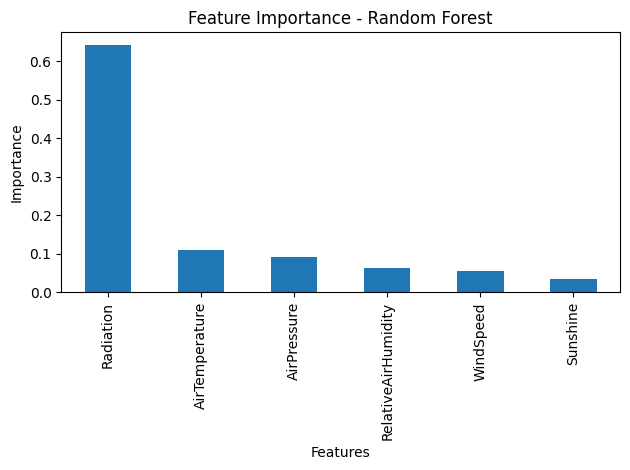

In [14]:
import matplotlib.pyplot as plt

plt.figure()
feature_importance.plot(kind="bar")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

## 10. Validasi Awal

In [15]:
y_pred_train = rf_model.predict(X_train)

print("Contoh prediksi:", y_pred_train[:5])

Contoh prediksi: [0. 0. 0. 0. 0.]
